## Question 8.a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from asg3_module import *

In [2]:
train = np.loadtxt('data/EMGaussian.train')
test = np.loadtxt('data/EMGaussian.test')

We now initialize and train an initial K-Means clustering model for plotting.

In [3]:
kmeans = KMeans()
kmeans.cluster(train)

We will now plot the results obtained by each of these six models in order to compare the obtained clusterings visually.

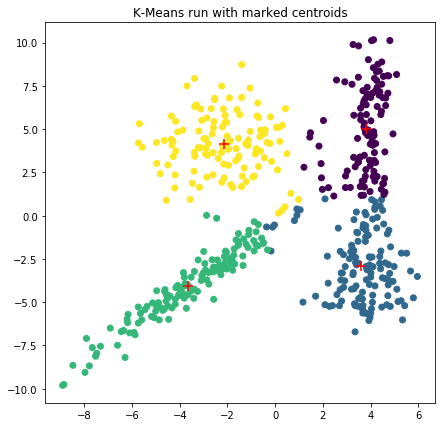

In [4]:
plt.figure(figsize = (7,7))
plt.scatter(train[:,0],train[:,1], c = np.nonzero(kmeans.cluster_map)[1])
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1], marker = '+', color = 'red', s = 100)
plt.title("K-Means run with marked centroids")
plt.savefig("Figures/kmeans.png")

We now run 5 independent initializations and compare achieved results.

In [5]:
kmeans = [KMeans() for i in range(5)]
centroids = []
measures = []
for km,i in zip(kmeans,range(len(kmeans))):
    km.cluster(train)
    print("Run ", i+1)
    print("------------")
    print("Centroids: \n", km.centroids)
    print("Distortion measure: ", km.get_distortion_measure())
    print("------------\n")

Run  1
------------
Centroids: 
 [[ 3.36449672 -2.65646983]
 [-3.79520578 -4.24816219]
 [-2.24034752  4.12744772]
 [ 3.80280826  5.10467248]]
Distortion measure:  3237.719306631707
------------

Run  2
------------
Centroids: 
 [[ 3.80280826  5.10467248]
 [-2.24034752  4.12744772]
 [ 3.33557966 -2.644529  ]
 [-3.81879354 -4.27423441]]
Distortion measure:  3237.779596496135
------------

Run  3
------------
Centroids: 
 [[-3.79520578 -4.24816219]
 [ 3.80007477  5.03387387]
 [-2.24034752  4.12744772]
 [ 3.36043143 -2.71082189]]
Distortion measure:  3238.138443064804
------------

Run  4
------------
Centroids: 
 [[ 3.78809286  4.99905357]
 [-3.72020481 -4.1849974 ]
 [ 3.57429183 -2.880828  ]
 [-2.14180002  3.97338429]]
Distortion measure:  3240.1732663625185
------------

Run  5
------------
Centroids: 
 [[ 3.78809286  4.99905357]
 [ 3.60401871 -2.88772669]
 [-2.1554649   4.11299388]
 [-3.6366214  -4.05302194]]
Distortion measure:  3240.5930247455117
------------



In general we see there is little variability between the achieved results, both in terms of total distortion measure and in terms of the centroids. In this run we have some initializations achieving the same centroid values. We can conclude from this that the data is robust to initialization choices for the centroids. This can be justified somewhat by the form of the data. Indeed, each cluster center is relatively well spread out from the other, giving us four distinct clusters in a two-dimensional space. 

## Question 8.b)

In [6]:
gmm_iso = GMM(cov_isotropic = True)
gmm_iso.cluster(train)

Given our trained model, we are ready to plot the data, gaussian contours, centers and cluster assignment in the same plot. We do so by assigning the same colour to data of the same cluster, and mark the means in red, as for KMeans.

In [7]:
def plot_gmm_clustering(data,labels, model, title, figure_path,scale=1,n_points=200):
    xlim = min(data[:,0])*scale, max(data[:,0]*scale)
    ylim = min(data[:,1]*scale), max(data[:,1]*scale)

    xx = np.linspace(xlim[0],xlim[1], n_points)
    yy = np.linspace(ylim[0],ylim[1], n_points)

    X,Y = np.meshgrid(xx,yy)
    points = np.transpose(np.array([X.flatten(), Y.flatten()]))
    
    
    fig = plt.figure(figsize = (10,10))
    plt.title(title)
    plt.scatter(data[:,0], data[:,1], c = labels)
    plt.scatter(model.mu[:,0], model.mu[:,1], color = 'red', marker='+', s = 100)
    for cluster in range(4):
        CS = plt.contour(X,Y, np.reshape([model.density(point,model.mu[cluster], model.sigma[cluster])for point in points], (n_points,n_points)))
    plt.clabel(CS, inline=1, fontsize=10)
    fig.savefig(figure_path)
    plt.show()

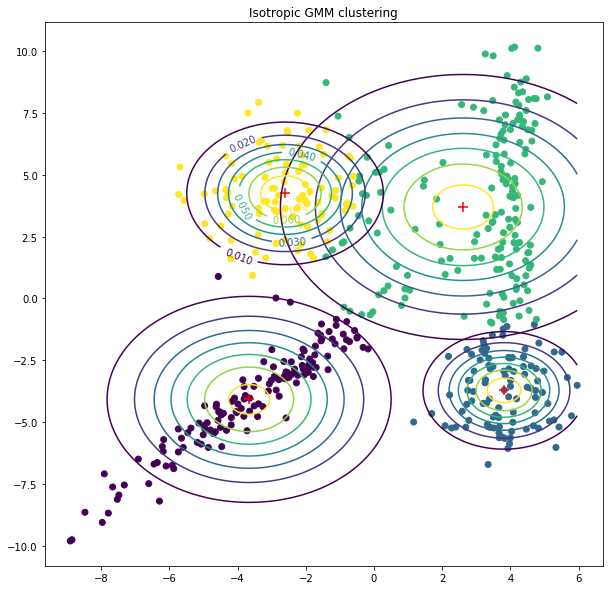

In [8]:
plot_gmm_clustering(train, np.argmax(gmm_iso.tau,axis =1), model = gmm_iso, title = 'Isotropic GMM clustering', figure_path='Figures/isotropic_gmm.png')

## Question 8.c)

In [13]:
gmm_gen = GMM(cov_isotropic = False)
gmm_gen.cluster(train)

Given our trained model, we are ready to plot the data, gaussian contours, centers and cluster assignment in the same plot. We do so by assigning the same colour to data of the same cluster, and mark the means in red, as for KMeans.

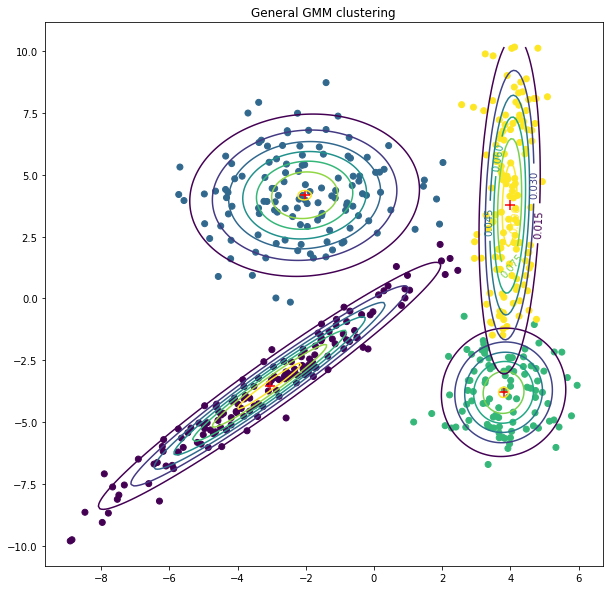

In [10]:
plot_gmm_clustering(train, np.argmax(gmm_gen.tau,axis =1), model = gmm_gen, title = 'General GMM clustering', figure_path='Figures/general_gmm.png')

## Question 8.d)

We are now ready to compare the results obtained. We can immediately see from the figures above that the general GMM performs much better than the one which assumes isotropic covariance. This is, of course, to be expected given that the different mixtures clearly have very different and non-isotropic covariance. This is obvious given the shape of the plotted clusters. Thus we would expect the normalized log-likelihood to be higher for the general GMM model than the isotropic one. We confirm this below:

In [11]:
def norm_log_likelihood(model, data, k):
    res = 0
    for i in range(data.shape[0]):
        for j in range(k):
            res+= (model.predict_proba_cluster(j,data[i,:])* np.log(model.density(data[i,:], mean = model.mu[j], sigma = model.sigma[j]))
                   + model.predict_proba_cluster(j,data[i,:])*np.log(model.pi[j]) )
    return res/(data.shape[0])

In [12]:
print("Normalized log-likelihood on training data")
print("-----------------------------------------")
print ("General GMM: ",norm_log_likelihood(gmm_gen, train, 4))
print ("Isotropic GMM: ", norm_log_likelihood(gmm_iso, train, 4))
print("-----------------------------------------")
print("Normalized log-likelihood on test data")
print("-----------------------------------------")
print ("General GMM: ",norm_log_likelihood(gmm_gen, test, 4))
print ("Isotropic GMM: ", norm_log_likelihood(gmm_iso, test, 4))
print("-----------------------------------------")

Normalized log-likelihood on training data
-----------------------------------------
General GMM:  -4.74176564718336
Isotropic GMM:  -5.478385969098712
-----------------------------------------
Normalized log-likelihood on test data
-----------------------------------------
General GMM:  -4.907123738835054
Isotropic GMM:  -5.437625460115813
-----------------------------------------


We see that our conclusion is validated : the general GMM model performs better on both the training and test sets, as expected. Comparing the plots with KMeans, it would seem that KMean clusters the data better than the isotropic GMM as well, which can be understood by the fact that KMeans is not constrained to model a circular covariance. Of course the general GMM is still better than KMeans as it is able to more or less fully capture the structure of the data, which is indeed a gaussian mixture.

In [15]:
gmm_gen.mu

array([[[ 0.92126511,  0.05737776],
        [ 0.05737776,  1.86592732]],

       [[ 0.2103536 ,  0.29042816],
        [ 0.29042816, 12.23952043]],

       [[ 2.90442618,  0.20655982],
        [ 0.20655982,  2.75617172]],

       [[ 6.24142705,  6.05019143],
        [ 6.05019143,  6.18247096]]])